<div style='background-color : orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align : center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#initial'>Initial Setup</a></li>
<li><a href='#unigram'>Unigrams</a></li>
<li><a href='#bigram'>Bigrams</a></li>
<li><a href='#trigram'>Trigrams</a></li>
<li><a href='#misc'>Miscellaneous</a></li>

<div style='background-color : orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align : center'>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [244]:
# Vectorization and dataframing
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from wordcloud import WordCloud

# Statistics
from scipy import stats

# Regex
import re

# NLP Prep
import unicodedata
import nltk

# Split
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# .py files
import wrangle as w

# env files
import env

In [132]:
# Set default plt style to 'bmh'
mpl.style.use('bmh')

<div style='background-color : orange'>
<a id='initial'></a>
    <b><u><i><h1 style='text-align : center'>
        Initial Setup
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [149]:
# Acquire the prepared repo data
repo_df = pd.read_csv('repo.csv', index_col=0)
repo_df.sample()

,repo,language,readme_contents,cleaned_readme_contents
91,shibing624/text2vec,Python,[![PyPI version](https://badge.fury.io/py/text...,pypi versionhttpsbadgefuryiopytext2vecsvghttps...


In [150]:
# Split data into train, val, test
train_validate, test = train_test_split(repo_df,
                                       random_state=1349,
                                       train_size=0.9,
                                       stratify=repo_df.language)
train, validate = train_test_split(train_validate,
                                  random_state=1349,
                                  train_size=0.778,
                                  stratify=train_validate.language)
train.shape, validate.shape, test.shape

((350, 4), (100, 4), (50, 4))

<div style='background-color : orange'>
<a id='unigram'></a>
    <b><u><i><h1 style='text-align : center'>
        Unigrams
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [201]:
# Split data into word groups
python_words = ' '.join(train[train.language == 'Python']['cleaned_readme_contents'].astype(str))
html_words = ' '.join(train[train.language == 'HTML']['cleaned_readme_contents'].astype(str))
all_words = ' '.join(train.cleaned_readme_contents.astype(str))
len(python_words), len(html_words), len(all_words)

(1729179, 378052, 2107232)

In [202]:
# Create frequencies for each word group
python_freq = pd.Series(python_words.split()).value_counts()
html_freq = pd.Series(html_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [203]:
# Create dataframe with all word frequencies
word_counts = (pd.concat([all_freq, python_freq, html_freq], axis=1, sort=True)
               .set_axis(['all', 'python', 'html'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int)))
word_counts.sample()

,all,python,html
utildownload_and_unzipurl,1,1,0


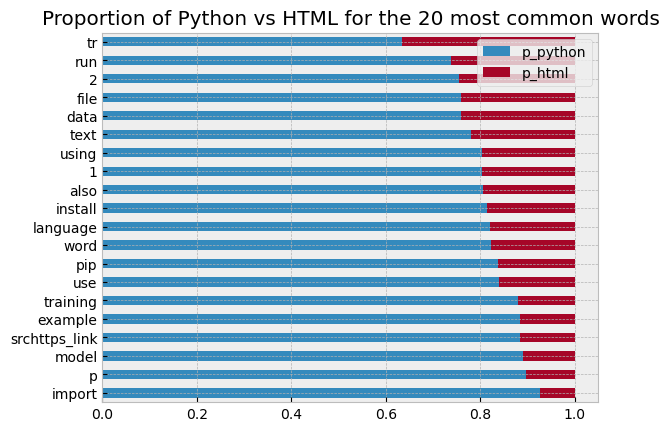

In [204]:
# Visualize word percentage of python vs. html
(word_counts
 .assign(p_python=word_counts.python / word_counts['all'],
         p_html=word_counts.html / word_counts['all'])
 .sort_values(by='all')
 [['p_python', 'p_html']]
 .tail(20)
 .sort_values('p_html')
 .plot.barh(stacked=True))

plt.title('Proportion of Python vs HTML for the 20 most common words')
plt.show()

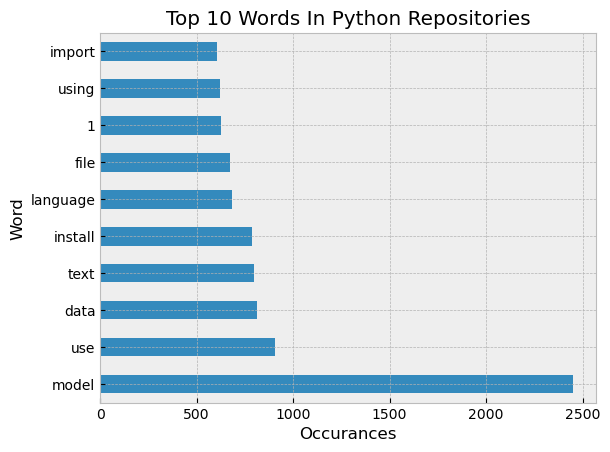

In [205]:
word_counts.python.sort_values(ascending=False).head(10).plot.barh()
plt.title('Top 10 Words In Python Repositories')
plt.xlabel('Occurances')
plt.ylabel('Word')
plt.show()

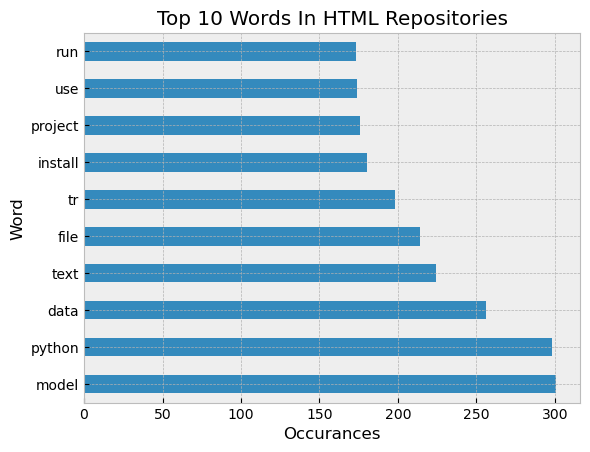

In [206]:
word_counts.html.sort_values(ascending=False).head(10).plot.barh()
plt.title('Top 10 Words In HTML Repositories')
plt.xlabel('Occurances')
plt.ylabel('Word')
plt.show()

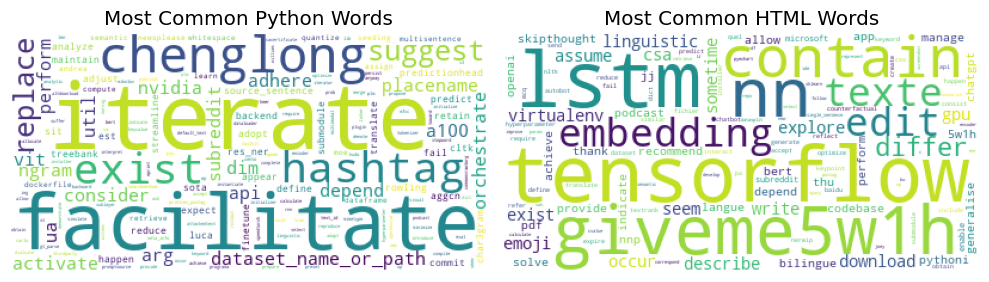

In [254]:
unique_python_words = set(python_words.split())
unigram_python_img = WordCloud(background_color='white').generate(' '.join(unique_python_words))
unique_html_words = set(html_words.split())
unigram_html_img = WordCloud(background_color='white').generate(' '.join(unique_html_words))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(unigram_python_img)
axs[0].axis('off')
axs[0].set_title('Most Common Python Words')
axs[1].imshow(unigram_html_img)
axs[1].axis('off')
axs[1].set_title('Most Common HTML Words')
plt.tight_layout()
plt.show()

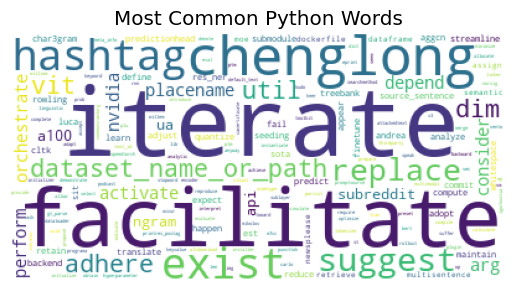

In [250]:
# Wordcloud (Expects a single string of words) of python unigram
unique_python_words = set(python_words.split())
unigram_python_img = WordCloud(background_color='White').generate(' '.join(unique_python_words))
plt.imshow(unigram_python_img)
plt.axis('off')
plt.title('Most Common Python Words')
plt.show()

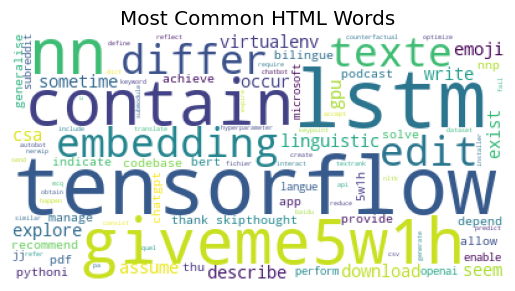

In [252]:
# Wordcloud (Expects a single string of words) of HTML unigram
unique_html_words = set(html_words.split())
unigram_html_img = WordCloud(background_color='White').generate(' '.join(unique_html_words))
plt.imshow(unigram_html_img)
plt.axis('off')
plt.title('Most Common HTML Words')
plt.show()

<div style='background-color : orange'>
<a id='bigram'></a>
    <b><u><i><h1 style='text-align : center'>
        Bigrams
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

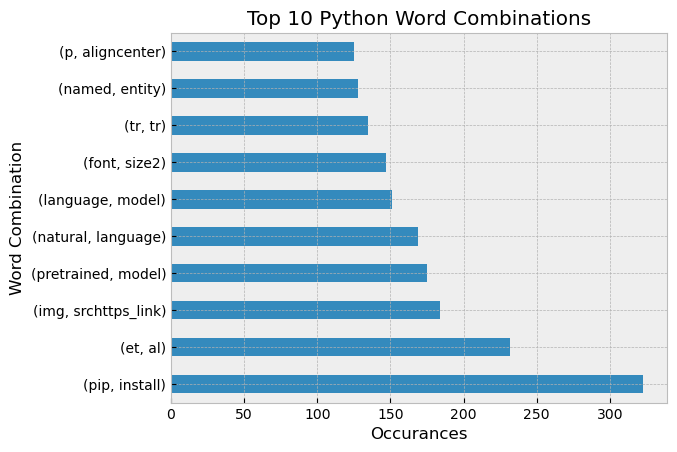

In [209]:
# Check combinations of python_words
python_bigram_words = pd.Series(nltk.bigrams(python_words.split()))
python_bigram_words.value_counts().head(10).plot.barh()
plt.title('Top 10 Python Word Combinations')
plt.xlabel('Occurances')
plt.ylabel('Word Combination')
plt.show()

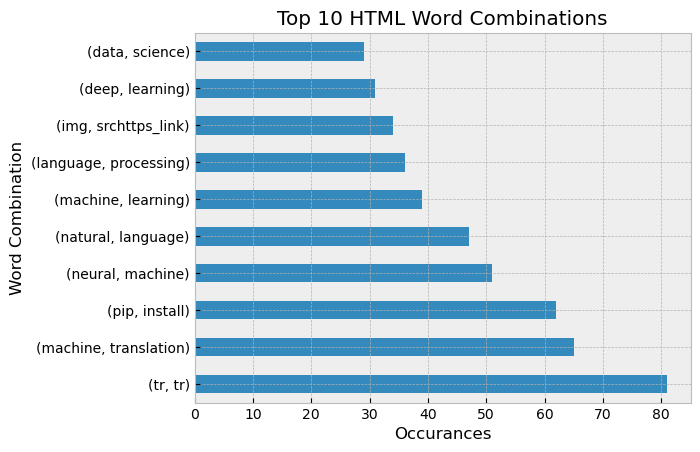

In [210]:
# Check combinations of html_words
html_bigram_words = pd.Series(nltk.bigrams(html_words.split()))
html_bigram_words.value_counts().head(10).plot.barh()
plt.title('Top 10 HTML Word Combinations')
plt.xlabel('Occurances')
plt.ylabel('Word Combination')
plt.show()

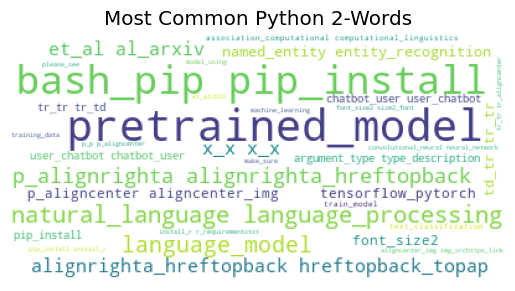

In [211]:
# Wordcloud (Expects a single string of words) of python bigram
python_bigram_words_combined = [bigram[0] + '_' + bigram[1] for bigram in python_bigram_words]
bigram_python_img = WordCloud(background_color='White').generate(' '.join(python_bigram_words_combined))
plt.imshow(bigram_python_img)
plt.axis('off')
plt.title('Most Common Python 2-Words')
plt.show()

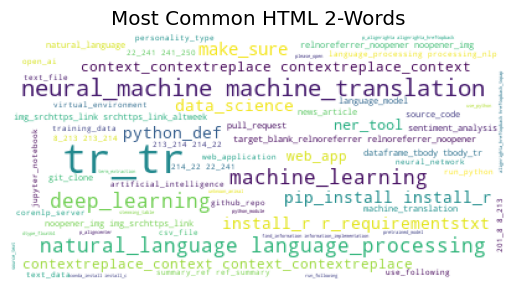

In [212]:
# Wordcloud (Expects a single string of words) of spam bigram
html_bigram_words_combined = [bigram[0] + '_' + bigram[1] for bigram in html_bigram_words]
bigram_html_img = WordCloud(background_color='White').generate(' '.join(html_bigram_words_combined))
plt.imshow(bigram_html_img)
plt.axis('off')
plt.title('Most Common HTML 2-Words')
plt.show()

<div style='background-color : orange'>
<a id='trigram'></a>
    <b><u><i><h1 style='text-align : center'>
        Trigrams
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

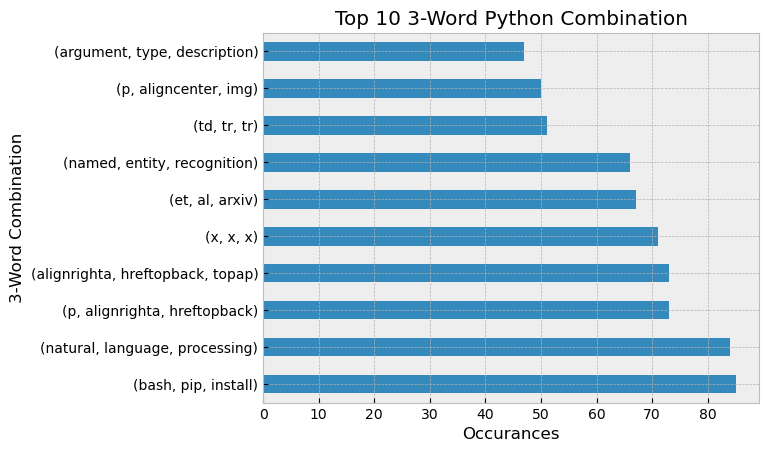

In [213]:
# Visualize distribution of trigrams of python
python_trigram_words = pd.Series(nltk.ngrams(python_words.split(), 3))
python_trigram_words.value_counts().head(10).plot.barh()
plt.title('Top 10 3-Word Python Combination')
plt.xlabel('Occurances')
plt.ylabel('3-Word Combination')
plt.show()

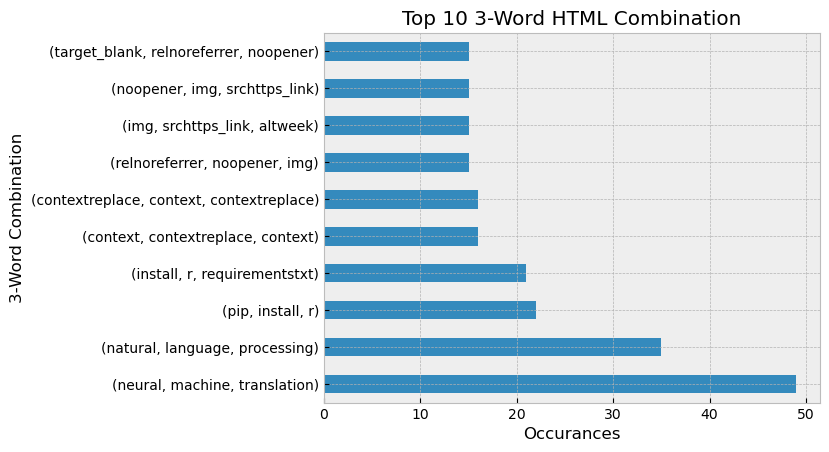

In [214]:
# Visualize distribution of trigrams of html
html_trigram_words = pd.Series(nltk.ngrams(html_words.split(), 3))
html_trigram_words.value_counts().head(10).plot.barh()
plt.title('Top 10 3-Word HTML Combination')
plt.xlabel('Occurances')
plt.ylabel('3-Word Combination')
plt.show()

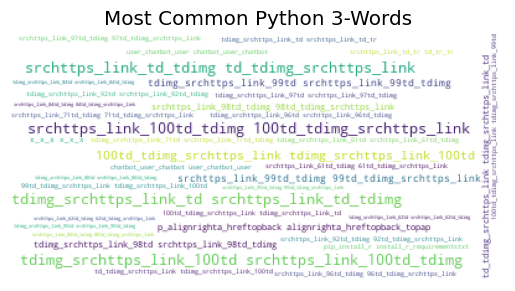

In [191]:
# Wordcloud (Expects a single string of words) of Python trigram
python_trigram_words_combined = [trigram[0] + '_' + trigram[1] + '_' + trigram[2] for trigram in python_trigram_words]
trigram_python_img = WordCloud(background_color='White').generate(' '.join(python_trigram_words_combined))
plt.imshow(trigram_python_img)
plt.axis('off')
plt.title('Most Common Python 3-Words')
plt.show()

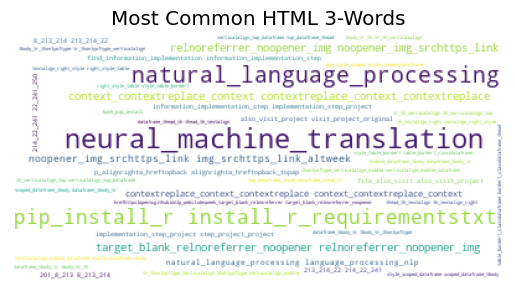

In [192]:
# Wordcloud (Expects a single string of words) of HTML trigram
html_trigram_words_combined = [trigram[0] + '_' + trigram[1] + '_' + trigram[2] for trigram in html_trigram_words]
trigram_html_img = WordCloud(background_color='White').generate(' '.join(html_trigram_words_combined))
plt.imshow(trigram_html_img)
plt.axis('off')
plt.title('Most Common HTML 3-Words')
plt.show()

---

<a id='q1takeaway'></a>
<h3><b><i>
    Takeaway
</i></b></h3>
<li><a href='#q1'>Question 1 Top</a></li>

- Python tends to have long strings of calls for their NLP process rather than calling out specific NLP terminology
- HTML tends to have a lot of terminology usage relating to the NLP process

<div style='background-color : orange'>
<a id='misc'></a>
    <b><u><i><h1 style='text-align : center'>
        Miscellaneous
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

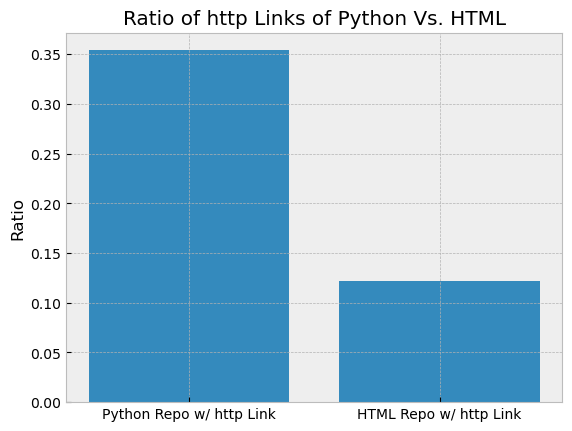

In [245]:
# Visual of http link ratio
python_http_ratio = train[train.language == 'Python'].cleaned_readme_contents.str.contains('srchttps_link').sum() / train[train.language == 'Python'].shape[0]
html_http_ratio = train[train.language == 'HTML'].cleaned_readme_contents.str.contains('srchttps_link').sum() / train[train.language == 'HTML'].shape[0]
ratios = [python_http_ratio, html_http_ratio]
labels = ['Python Repo w/ http Link', 'HTML Repo w/ http Link']
plt.bar(labels, ratios)
plt.ylabel('Ratio')
plt.title('Ratio of http Links of Python Vs. HTML')
plt.show()

In [215]:
# Check the significance of the language vs. if the contents have 'http'
alpha = 0.05
observed = pd.crosstab(train.language, train.cleaned_readme_contents.str.contains('srchttps_link'))
p = stats.chi2_contingency(observed)[1]
if p < alpha:
    print('\033[32m========== REJECT THE NULL HYPOTHESIS! ==========\033[0m')
    print(f'\033[35mP-Value:\033[0m {p:.8f}')
else:
    print('\033[31m========== ACCEPT THE NULL HYPOTHESIS! ==========\033[0m')
    print(f'\033[35mP-Value:\033[0m {p:.8f}')

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000227


In [151]:
# Change all the 'srchttps...' strings
srchttps_text = []
for text in train.cleaned_readme_contents.astype(str):
    regexp = r'srchttps\w+'
    srchttps_text.append(re.sub(regexp, 'srchttps_link', text))
train.cleaned_readme_contents = srchttps_text

In [162]:
# Remove all '&#9;' occurances
weird_text = []
for text in train.cleaned_readme_contents.astype(str):
    regexp = r'&#9;'
    weird_text.append(re.sub(regexp, '', text))
train.cleaned_readme_contents = weird_text

In [200]:
# Remove outlier repo
train = train[~train.repo.str.startswith('pemistahl')]